# 📊 Análisis Exploratorio de Datos (EDA)

En este notebook exploraremos el conjunto de datos de eficiencia energética de la UCI Machine Learning Repository. El objetivo es comprender la estructura, distribución y relaciones entre las variables, para luego preparar los datos que se utilizarán en modelos de regresión.

Se analizarán dos variables objetivo:
- `Heating Load`: demanda de calefacción
- `Cooling Load`: demanda de refrigeración

Los pasos a seguir incluyen la carga, inspección, visualización y limpieza básica del dataset.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os

from ucimlrepo import fetch_ucirepo

# Agregar el directorio src al PATH
sys.path.append(os.path.join(os.path.dirname(os.getcwd()), 'src'))
from utils_EDA import analizar_columna_num, graficar_scatterplot

# Configuración visual
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('Set2')

## 🔍 Carga de datos

Usaremos la librería `ucimlrepo` para descargar directamente el conjunto de datos. Luego, combinaremos las características (`X`) y las variables objetivo (`y`) en un solo DataFrame para facilitar el análisis.

In [3]:
# Cargar datos desde UCI
energy_efficiency = fetch_ucirepo(id=242)

# Separar en features y targets
X = energy_efficiency.data.features
y = energy_efficiency.data.targets

# Combinar
df = pd.concat([X, y], axis=1)
df.head()


,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


## ℹ️ Información General

Vamos a explorar la estructura del DataFrame, sus dimensiones, tipos de variables y estadísticas básicas.

In [4]:
print(f"Dimensiones del dataset: {df.shape}")
df.info()
df.describe().T

Dimensiones del dataset: (768, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      768 non-null    float64
 1   X2      768 non-null    float64
 2   X3      768 non-null    float64
 3   X4      768 non-null    float64
 4   X5      768 non-null    float64
 5   X6      768 non-null    int64  
 6   X7      768 non-null    float64
 7   X8      768 non-null    int64  
 8   Y1      768 non-null    float64
 9   Y2      768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


,count,mean,std,min,25%,50%,75%,max
X1,768.0,0.764167,0.105777,0.62,0.6825,0.75,0.8300,0.98
X2,768.0,671.708333,88.086116,514.50,606.3750,673.75,741.1250,808.50
X3,768.0,318.500000,43.626481,245.00,294.0000,318.50,343.0000,416.50
X4,768.0,176.604167,45.165950,110.25,140.8750,183.75,220.5000,220.50
X5,768.0,5.250000,1.751140,3.50,3.5000,5.25,7.0000,7.00
X6,768.0,3.500000,1.118763,2.00,2.7500,3.50,4.2500,5.00
X7,768.0,0.234375,0.133221,0.00,0.1000,0.25,0.4000,0.40
X8,768.0,2.812500,1.550960,0.00,1.7500,3.00,4.0000,5.00
Y1,768.0,22.307201,10.090196,6.01,12.9925,18.95,31.6675,43.10
Y2,768.0,24.587760,9.513306,10.90,15.6200,22.08,33.1325,48.03


## 🔎 Observaciones del Dataset

A partir de la inspección general de los datos, se destacan los siguientes puntos:

- El conjunto de datos contiene **768 registros y 10 columnas**, sin presencia de valores nulos.
- Las variables de entrada están codificadas como `X1` a `X8`, y las variables objetivo como `Y1` (Heating Load) y `Y2` (Cooling Load).
- Todas las variables tienen tipo de dato numérico (`float64` o `int64`), lo cual es adecuado para modelos de regresión sin necesidad de conversión adicional.
- Algunas observaciones específicas:
  - `X1` a `X4` parecen ser variables continuas relacionadas con geometría y superficie de la edificación (valores entre 0.6 y 800 aprox.).
  - `X6` y `X8` son variables enteras con valores discretos, lo que sugiere que podrían ser **variables categóricas codificadas como números** (como orientación o tipo de acristalamiento).
  - `X7` tiene una media de 0.23 y un máximo de 0.4, lo que sugiere que es una **proporción** o razón.
- Las variables objetivo (`Y1`, `Y2`):
  - `Y1` (Heating Load) tiene una media de 22.3 y un rango entre 6.01 y 43.1.
  - `Y2` (Cooling Load) tiene una media de 24.6 y un rango entre 10.9 y 48.0.
  - Ambas variables muestran **alta dispersión**, lo que puede implicar diferencias marcadas según los valores de las features.

Estas observaciones serán útiles para entender el comportamiento del modelo y evaluar qué variables tienen mayor influencia sobre el consumo energético.

## 🚫 Valores nulos y duplicados

Verificaremos si existen valores faltantes o filas duplicadas que puedan afectar el análisis posterior.

In [5]:
print(df.isnull().sum())
print(f"Filas duplicadas: {df.duplicated().sum()}")

X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
X7    0
X8    0
Y1    0
Y2    0
dtype: int64
Filas duplicadas: 0


## 📊 Distribución de las variables

Visualizamos la distribución de todas las columnas para detectar posibles valores atípicos, sesgos o transformaciones necesarias.


## X1

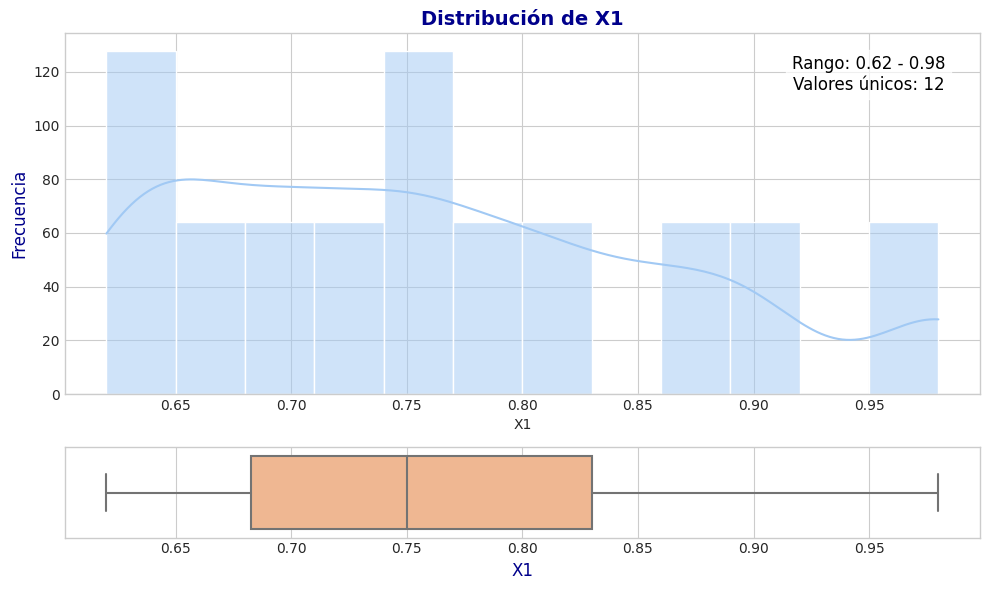

In [6]:
analizar_columna_num("X1", df)

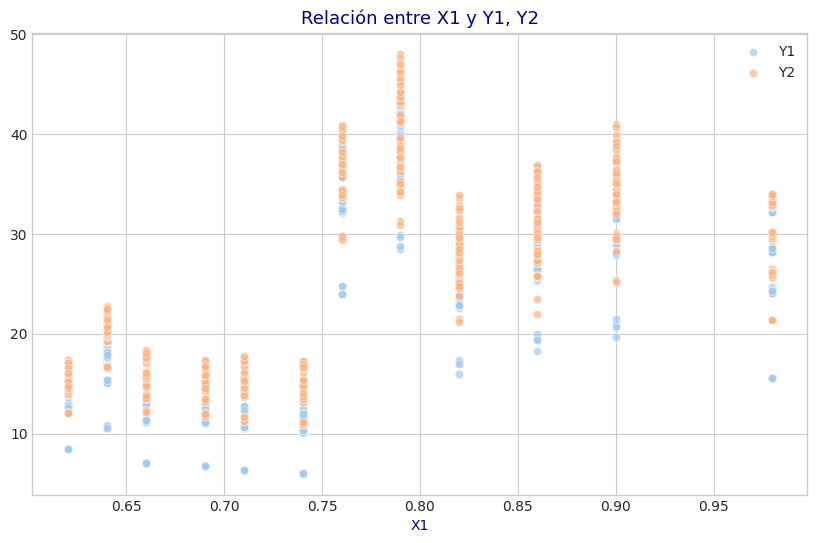

In [7]:
graficar_scatterplot(df, "X1", "Y1", "Y2")

> Al observar los gráficos, no se evidencia la presencia de outliers en la variable analizada. Esta presenta 12 valores únicos y una distribución bimodal, lo que sugiere que **no es necesario aplicar una transformación numérica**. Dado el reducido número de valores distintos y la forma de su distribución, también **podría considerarse la opción de tratar esta variable como categórica**, dependiendo del contexto del análisis.

## X2

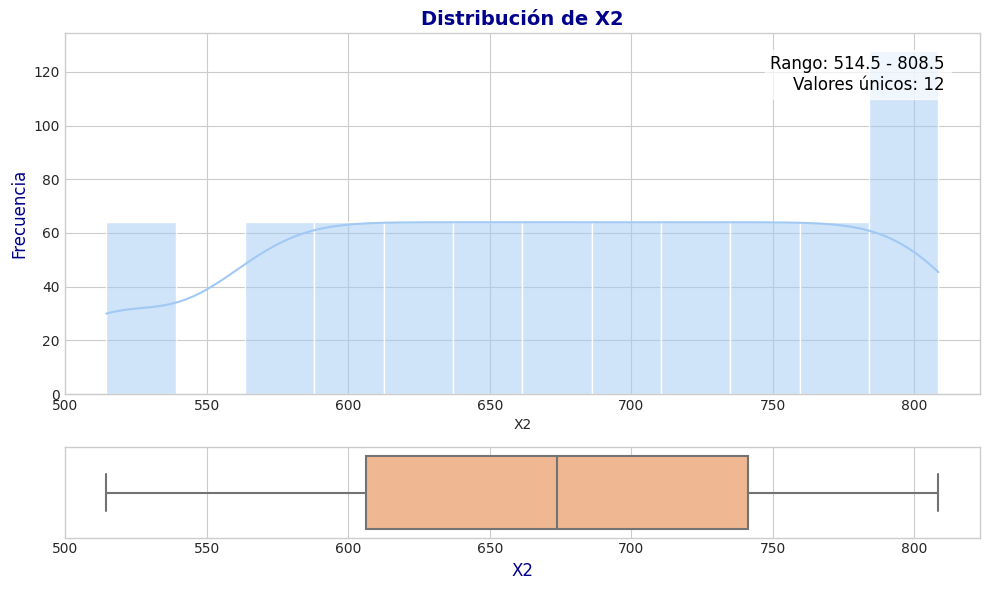

In [8]:
analizar_columna_num("X2", df)

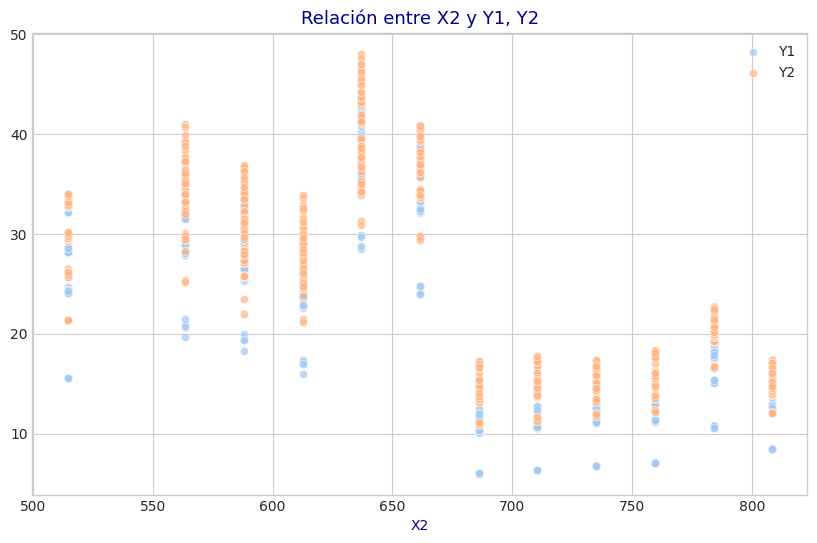

In [9]:
graficar_scatterplot(df, "X2", "Y1", "Y2")

> Al observar los gráficos, no se evidencia la presencia de outliers en la variable analizada. Esta presenta 12 valores únicos, lo que sugiere que **no es necesario aplicar una transformación numérica**. Dado el reducido número de valores distintos y la forma de su distribución, también **podría considerarse la opción de tratar esta variable como categórica**, dependiendo del contexto del análisis.

## X3

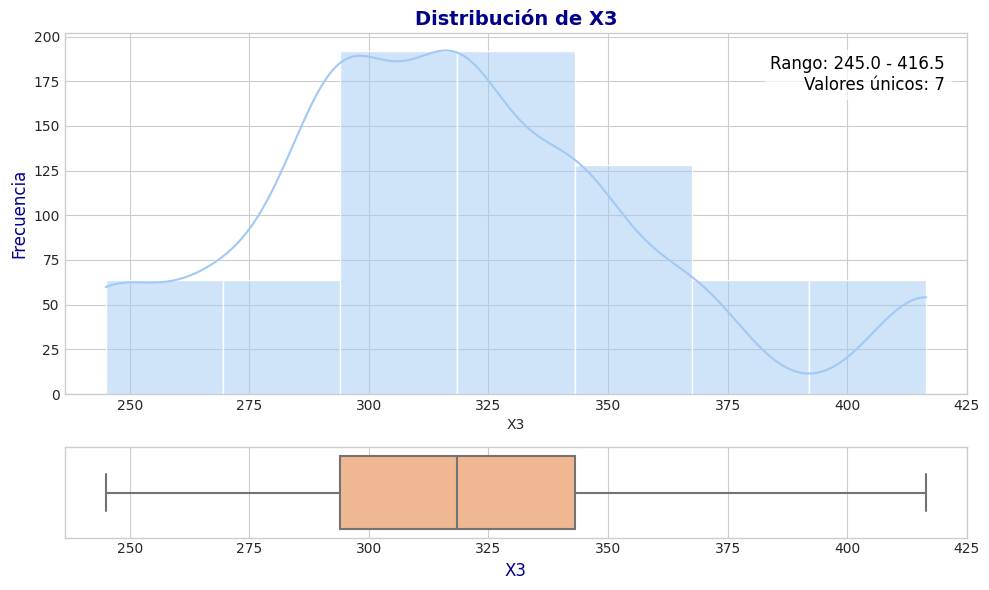

In [10]:
analizar_columna_num("X3", df)

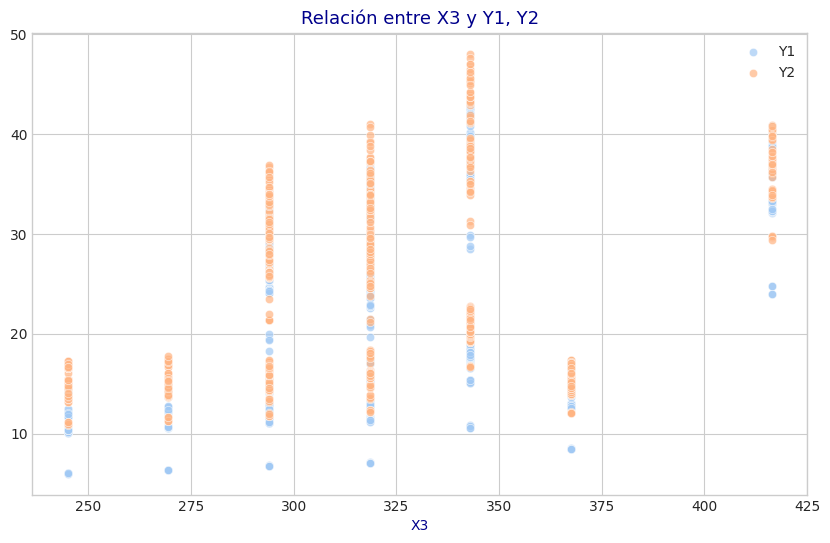

In [11]:
graficar_scatterplot(df, "X3", "Y1", "Y2")

> Al observar los gráficos, no se evidencia la presencia de outliers en la variable analizada. Esta presenta 7 valores únicos y una distribución bimodal, lo que sugiere que **no es necesario aplicar una transformación numérica**. Dado el reducido número de valores distintos y la forma de su distribución, también **podría considerarse la opción de tratar esta variable como categórica**, dependiendo del contexto del análisis.

## X4

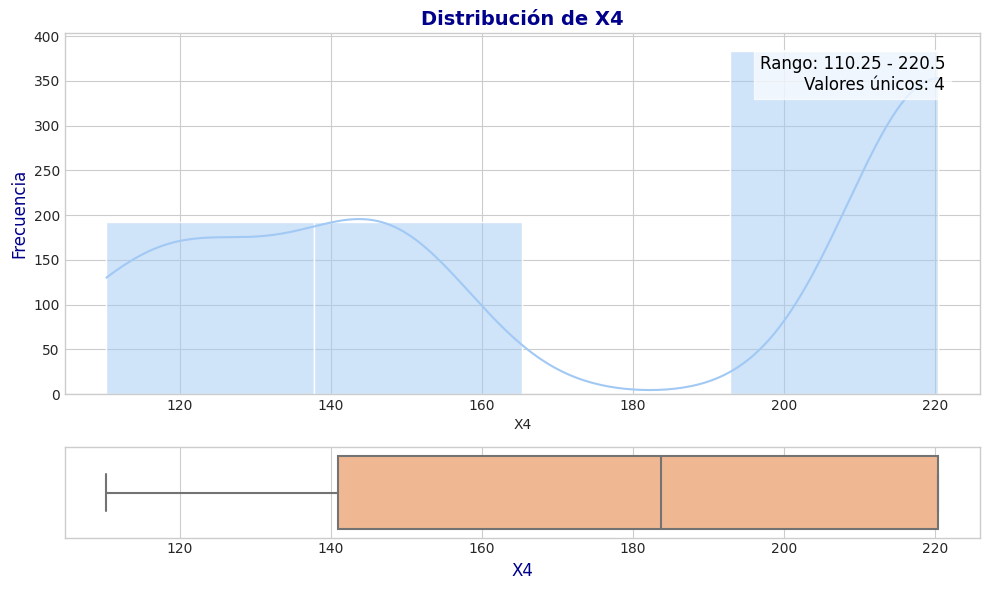

In [12]:
analizar_columna_num("X4", df)

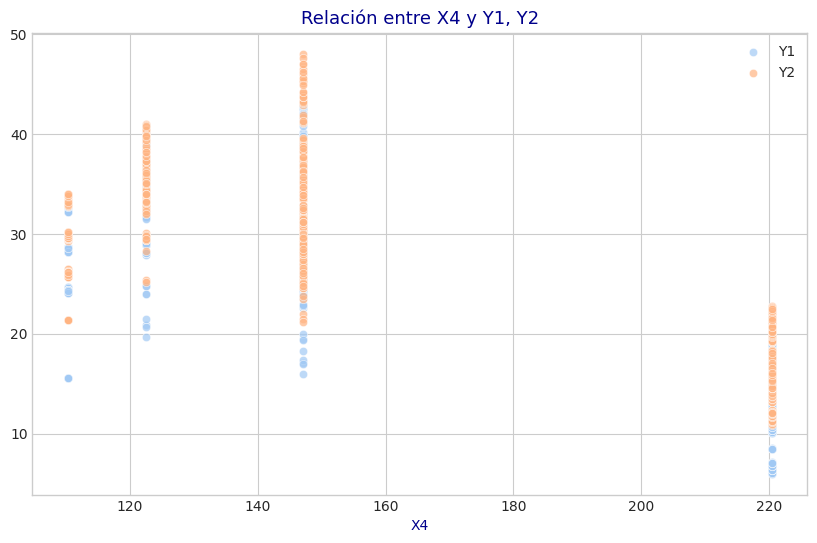

In [13]:
graficar_scatterplot(df, "X4", "Y1", "Y2")

> Al observar los gráficos, no se evidencia la presencia de outliers en la variable analizada. Esta presenta 4 valores únicos, lo que sugiere que **no es necesario aplicar una transformación numérica**. Dado el reducido número de valores distintos y la forma de su distribución, también **podría considerarse la opción de tratar esta variable como categórica**, dependiendo del contexto del análisis.

## X5

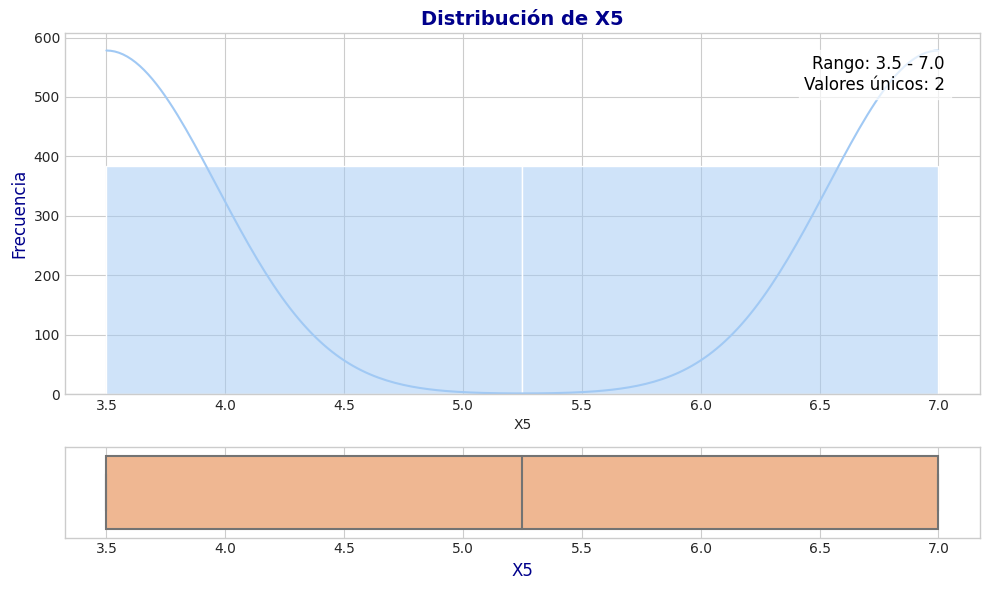

In [14]:
analizar_columna_num("X5", df)

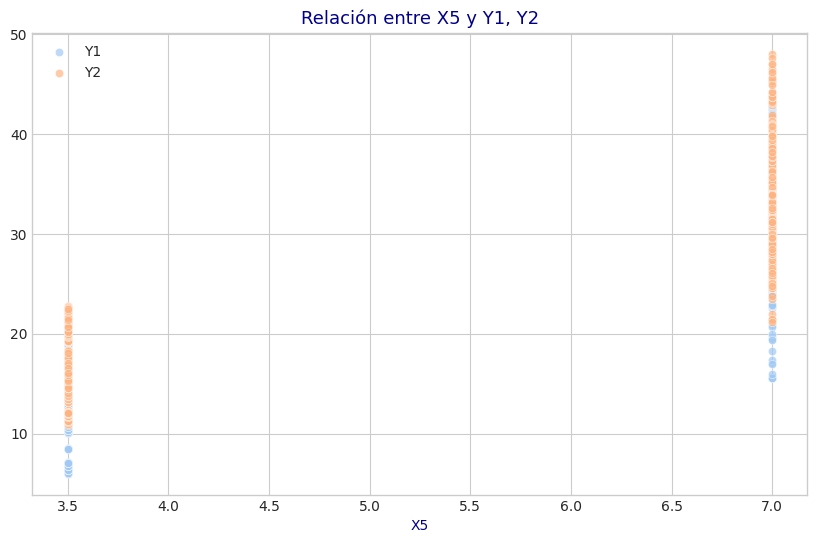

In [15]:
graficar_scatterplot(df, "X5", "Y1", "Y2")

> Al observar los gráficos, no se evidencia la presencia de outliers en la variable analizada. Esta presenta 2 valores únicos, lo que sugiere que **no es necesario aplicar una transformación numérica**. Dado el reducido número de valores distintos y la forma de su distribución, también **podría considerarse la opción de tratar esta variable como categórica**, dependiendo del contexto del análisis.

## X6

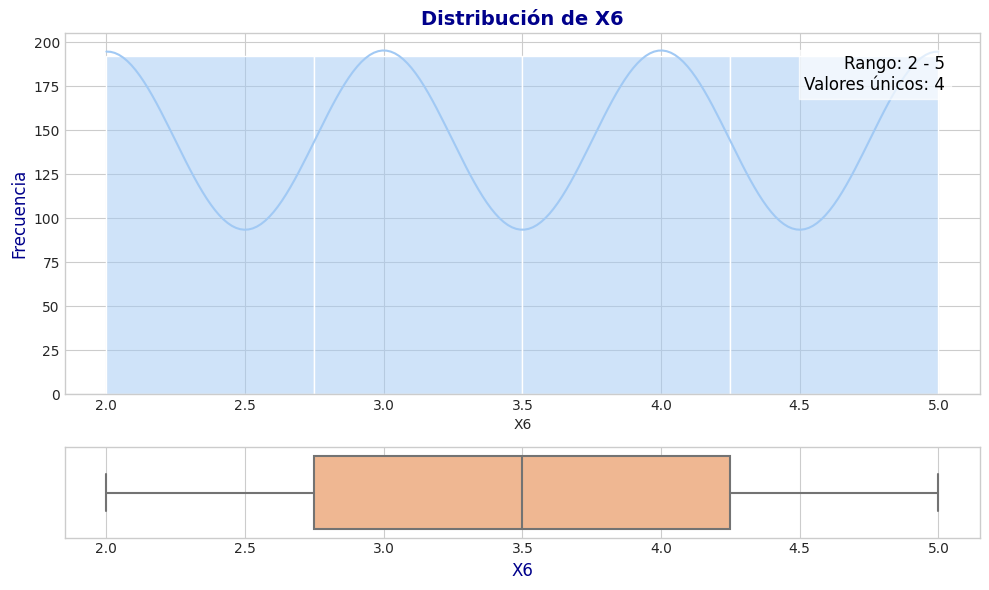

In [16]:
analizar_columna_num("X6", df)

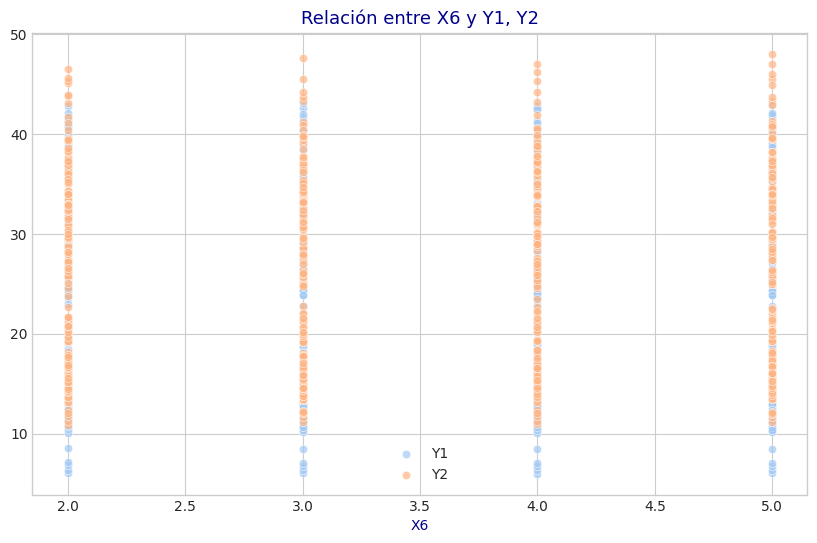

In [17]:
graficar_scatterplot(df, "X6", "Y1", "Y2")

> Al observar los gráficos, no se evidencia la presencia de outliers en la variable analizada. Esta presenta 4 valores únicos, lo que sugiere que **no es necesario aplicar una transformación numérica**. Dado el reducido número de valores distintos y la forma de su distribución, también **podría considerarse la opción de tratar esta variable como categórica**, dependiendo del contexto del análisis.

## X7

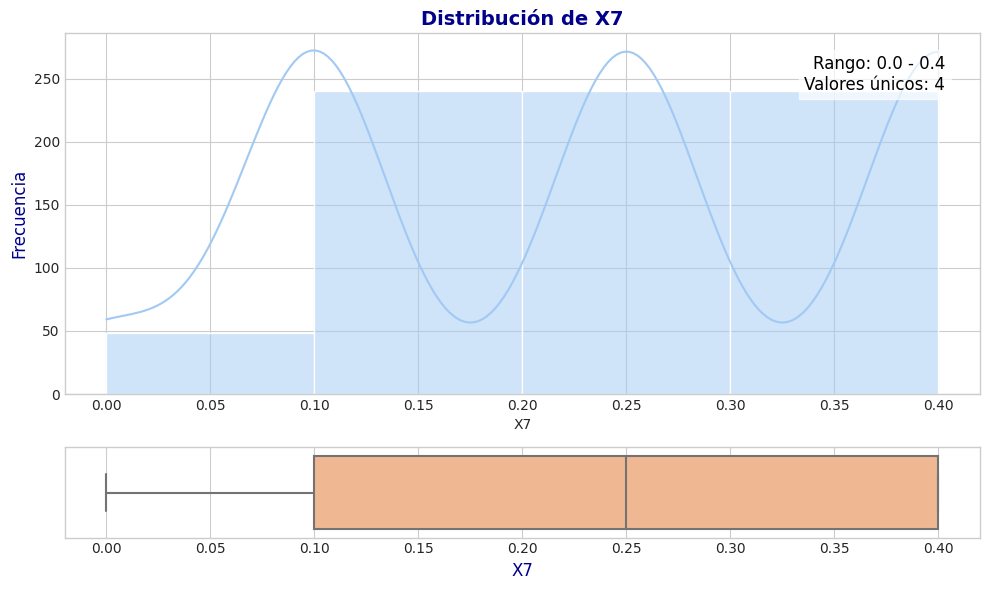

In [18]:
analizar_columna_num("X7", df)

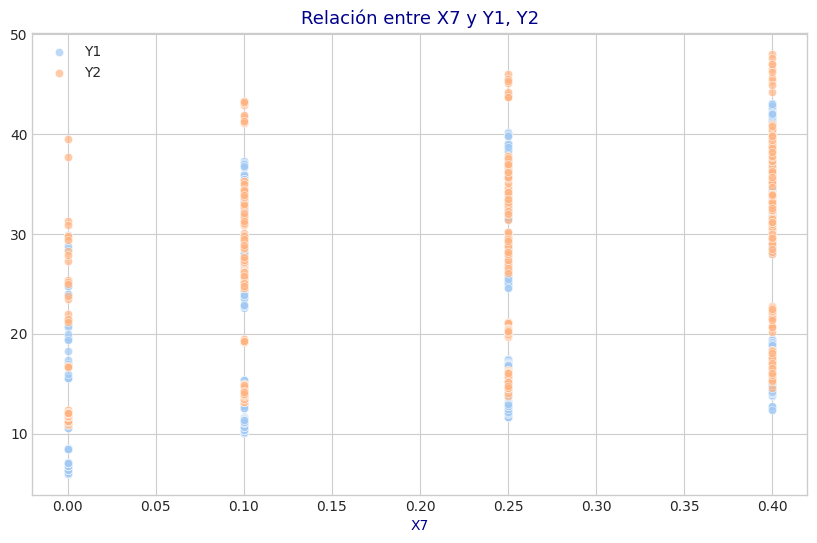

In [19]:
graficar_scatterplot(df, "X7", "Y1", "Y2")

> Al observar los gráficos, no se evidencia la presencia de outliers en la variable analizada. Esta presenta 4 valores únicos, lo que sugiere que **no es necesario aplicar una transformación numérica**. Dado el reducido número de valores distintos y la forma de su distribución, también **podría considerarse la opción de tratar esta variable como categórica**, dependiendo del contexto del análisis.

## X8

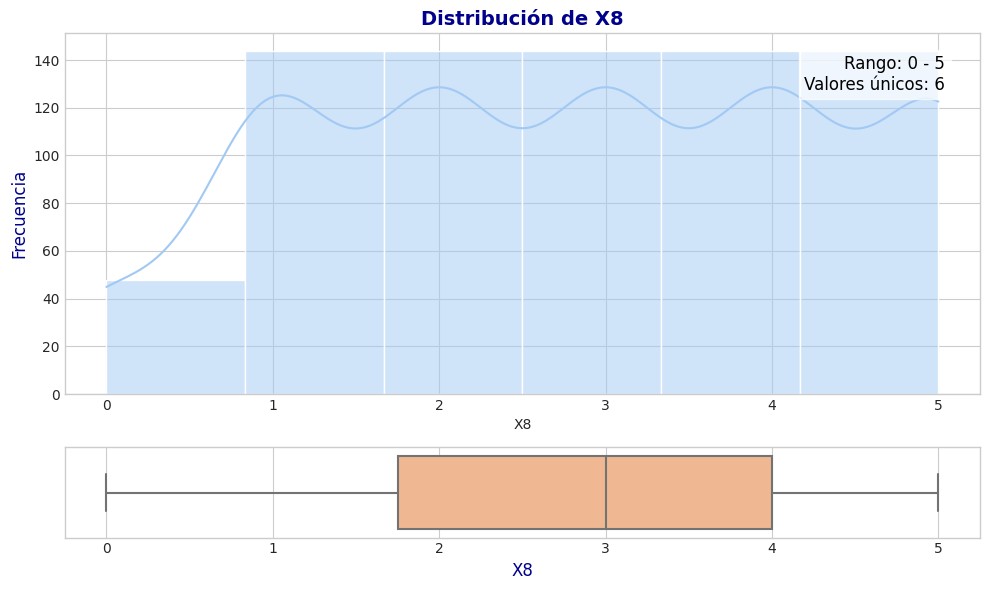

In [20]:
analizar_columna_num("X8", df)

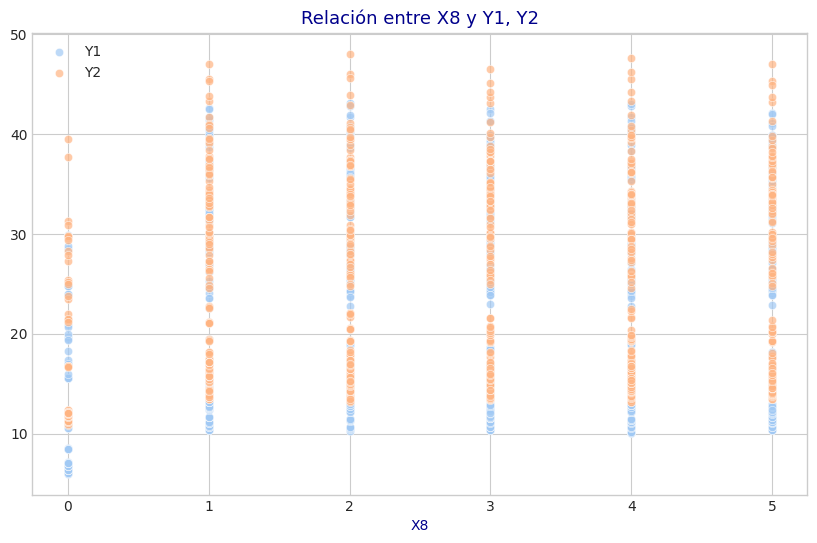

In [21]:
graficar_scatterplot(df, "X8", "Y1", "Y2")

> Al observar los gráficos, no se evidencia la presencia de outliers en la variable analizada. Esta presenta 6 valores únicos, lo que sugiere que **no es necesario aplicar una transformación numérica**. Dado el reducido número de valores distintos y la forma de su distribución, también **podría considerarse la opción de tratar esta variable como categórica**, dependiendo del contexto del análisis.

## Y1

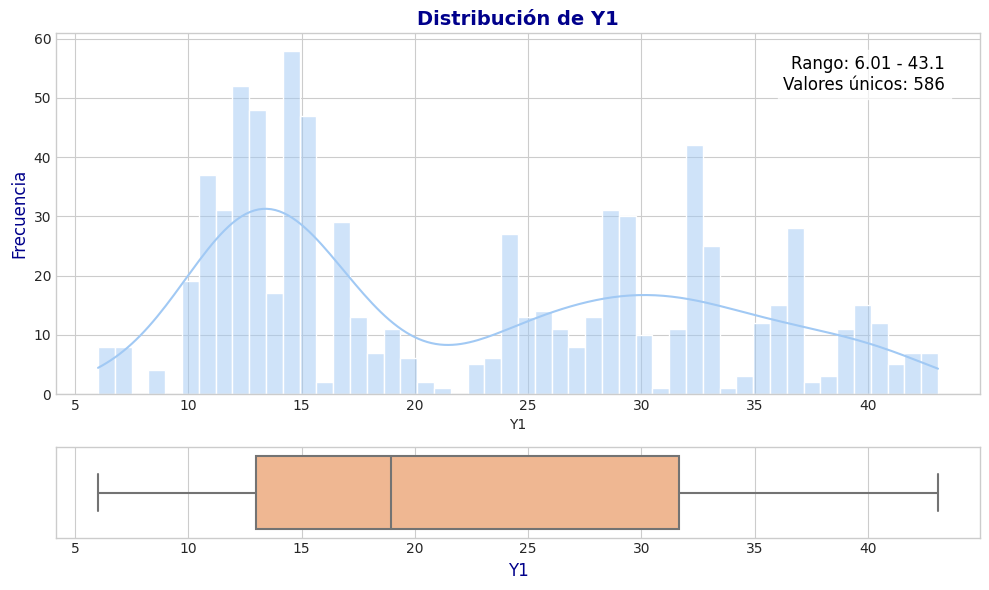

In [22]:
analizar_columna_num("Y1", df)

## Y2

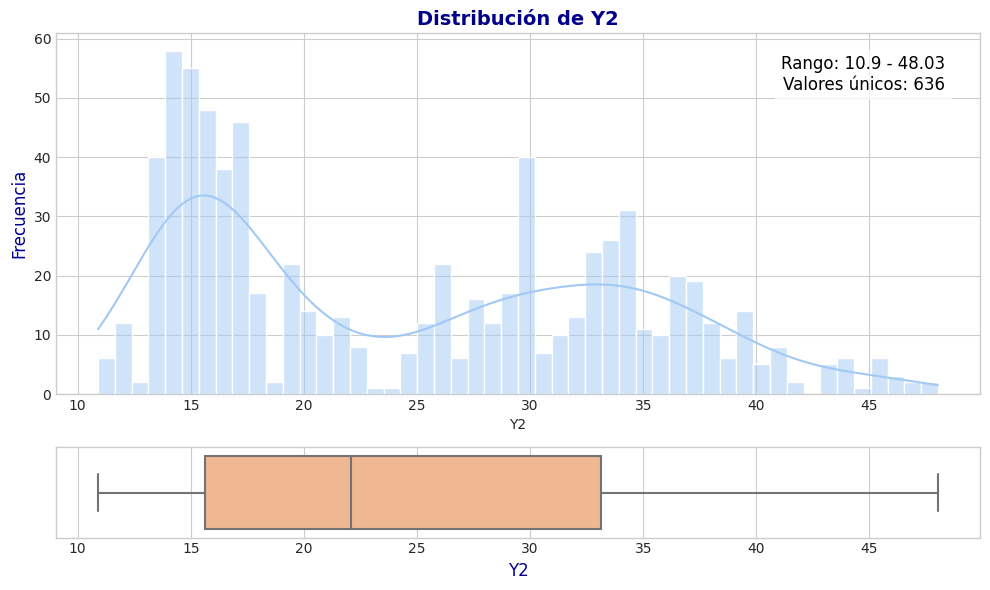

In [23]:
analizar_columna_num("Y2", df)

#### **Observaciones**
Al analizar las variables, se observa que:
* No presentan outliers y que no siguen una distribución normal. 


En particular, debido a la naturaleza de una de las variables numéricas —caracterizada por un número limitado de valores únicos— **podría evaluarse su transformación a variable categórica** para analizar su impacto en el modelo. 

En cuanto a las variables objetivo, estas tampoco siguen una distribución normal y, en general, no presentan relaciones lineales evidentes con las demás variables, con la excepción de **la variable X5, la cual sí muestra una relación lineal notable** y, además, no presenta valores atípicos.

## 🔗 Correlación entre variables

Calculamos la matriz de correlación para identificar relaciones fuertes entre variables predictoras y las variables objetivo.


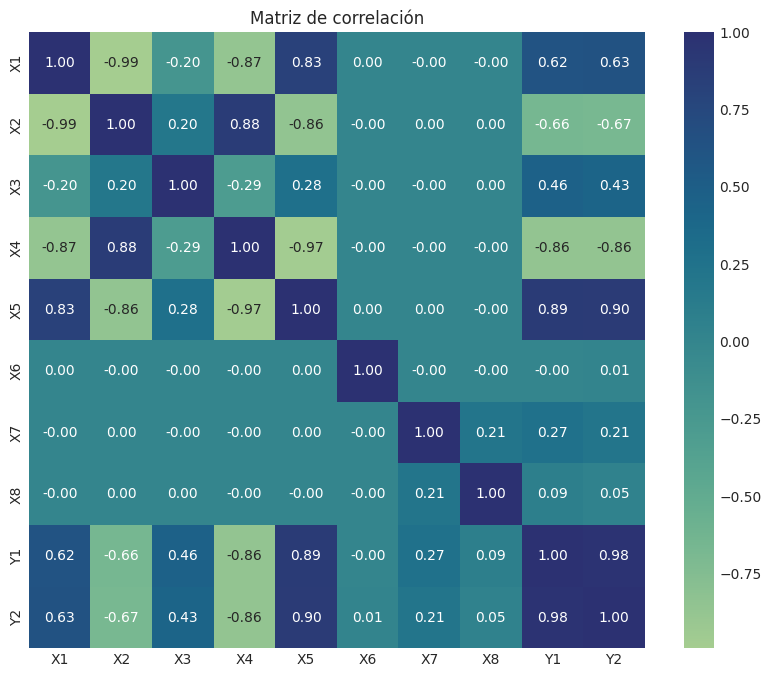

In [24]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="crest", square=True)
plt.title("Matriz de correlación")
plt.show()

> Al analizar la matriz de correlación, se observa que la variable **X5 presenta una fuerte correlación positiva con las variables objetivo**, mientras que **X4 muestra una correlación negativa también significativa**, aunque de menor magnitud que X5. 

> Por otro lado, **las variables X6, X7 y X8 evidencian una correlación débil** con las variables objetivo. 

> Finalmente, las **dos variables objetivo presentan entre sí una correlación positiva considerablemente alta**.

## 📂 Separación de variables

Separamos el dataset en variables independientes `X` y las dos variables objetivo `y_heating` y `y_cooling`. Esto facilitará el entrenamiento y evaluación de modelos.


In [25]:
X = df.drop(columns=["Y1", "Y2"])
y_heating = df["Y1"]
y_cooling = df["Y2"]

## 💾 Guardar archivos procesados

Exportamos las versiones limpias del dataset a la carpeta `data/` para su uso en futuros notebooks.


In [26]:
os.makedirs("../data", exist_ok=True)

X.to_csv("../data/features.csv", index=False)
y_heating.to_csv("../data/y_heating.csv", index=False)
y_cooling.to_csv("../data/y_cooling.csv", index=False)

## 📌 Conclusiones del Análisis Exploratorio

El análisis exploratorio del conjunto de datos de eficiencia energética permitió identificar aspectos clave que serán relevantes para la etapa de modelado:

- **Ausencia de outliers:** Las variables no presentan valores atípicos evidentes, lo cual simplifica el preprocesamiento.
- **Distribuciones no normales:** Ni las variables predictoras ni las variables objetivo siguen una distribución normal, lo que sugiere que podrían requerirse transformaciones específicas en caso de usar modelos sensibles a esta condición.
- **X5 como variable relevante:** Se identificó una **fuerte relación lineal y correlación positiva** entre la variable `X5` y las dos variables objetivo (`Y1`, `Y2`), posicionándola como una potencial variable clave para la predicción.
- **X4 con correlación negativa:** La variable `X4` muestra una correlación negativa significativa, aunque más débil que la de `X5`.
- **Variables con bajo aporte:** Las variables `X6`, `X7` y `X8` evidencian **baja correlación** con las variables objetivo, por lo que podrían tener un aporte limitado al modelo.
- **Relación entre Y1 y Y2:** Las variables objetivo (`Y1` y `Y2`) presentan una **correlación positiva alta**, lo que puede ser útil si se decide abordar un enfoque multisalida o si se analiza una en función de la otra.
- **Posible categorización:** Se detectó una variable con pocos valores únicos que podría tratarse como **variable categórica** para evaluar su efecto con modelos que lo permitan.

Estas observaciones guiarán la selección de variables, la ingeniería de características y la elección de los algoritmos de regresión en la siguiente etapa del proyecto.
